In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Show plots inline in the notebook
%matplotlib inline

# ===== 1. Load dataset =====
df = pd.read_csv("FullData.csv")  # change name/path if needed
print(f"✅ Loaded dataset with {len(df):,} rows and {len(df.columns)} columns")

# Automatically detect target column (e.g. FI Rate)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
target_candidates = [c for c in df.columns if c.lower() in ["fi rate","fi_rate","firate","food_insecurity_rate"]]
if not target_candidates:
    target_candidates = [c for c in df.columns if "rate" in c.lower()]
target = target_candidates[0] if target_candidates else None
print("🎯 Target detected:", target)



✅ Loaded dataset with 101,803 rows and 30 columns
🎯 Target detected: FI Rate


/var/folders/mf/11b4rchj00n1z21h5twcs4jr0000gn/T/ipykernel_44224/1728562185.py:9: DtypeWarning: Columns (3,7,8,18,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("FullData.csv")  # change name/path if needed


In [33]:
# ===== 2. Basic summaries =====
print("\n📋 Data Dictionary (first 5 columns):")
print(df.dtypes.head())

print("\n⚠️ Missing values summary:")
print(df.isna().sum().head())

print("\n📊 Numeric Summary:")
display(df.describe().T.round(3))


📋 Data Dictionary (first 5 columns):
FIPS                int64
Rent              float64
Year                int64
coc_number         object
Houseless_rate    float64
dtype: object

⚠️ Missing values summary:
FIPS                  0
Rent              87782
Year                  0
coc_number        54316
Houseless_rate    54316
dtype: int64

📊 Numeric Summary:


,count,mean,std,min,25%,50%,75%,max
FIPS,101803.0,31217.626,16091.360,1001.000,19009.000,30033.000,46069.000,7.215300e+04
Rent,14021.0,2273.860,1594.837,619.333,1440.328,1800.910,2484.028,2.252883e+04
Year,101803.0,2017.505,4.180,2009.000,2014.000,2019.000,2020.000,2.024000e+03
Houseless_rate,47487.0,0.001,0.001,0.000,0.001,0.001,0.001,1.700000e-02
Sheltered_rate,47487.0,0.001,0.001,0.000,0.000,0.001,0.001,1.200000e-02
Unsheltered_rate,47487.0,0.000,0.001,0.000,0.000,0.000,0.000,1.600000e-02
TOT_POP,48057.0,124318.475,481666.737,82.667,11206.000,26660.667,73028.000,1.010571e+07
TOT_MALE,48057.0,61144.446,236563.357,41.000,5643.667,13295.000,36202.000,4.980981e+06
TOT_FEMALE,48057.0,63174.029,245136.906,35.000,5548.000,13271.000,36610.000,5.125335e+06
TOT_WHITE,48057.0,94835.444,341749.376,24.000,9305.000,22902.667,61927.000,7.181207e+06



📈 Feature Distributions:


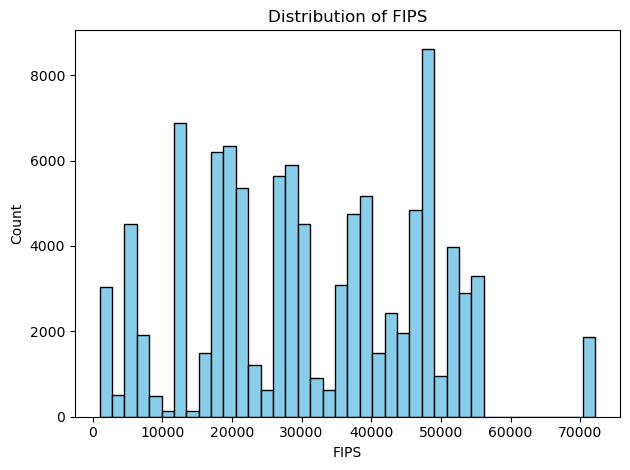

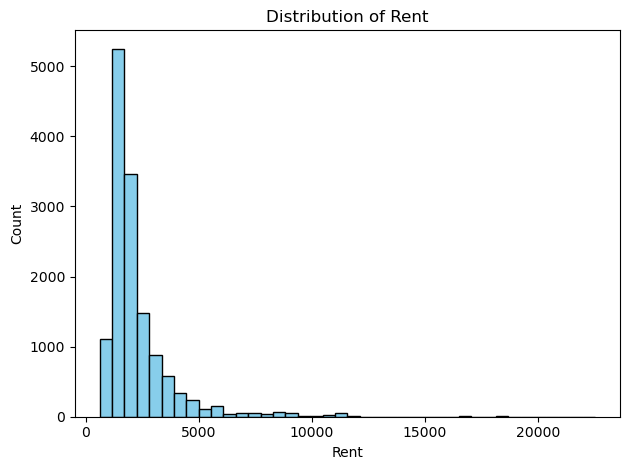

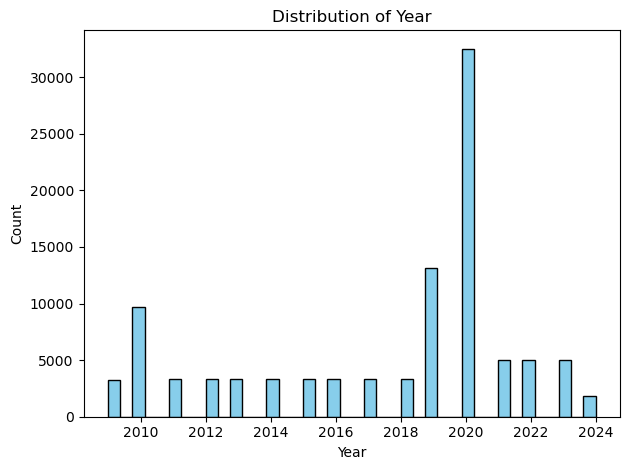

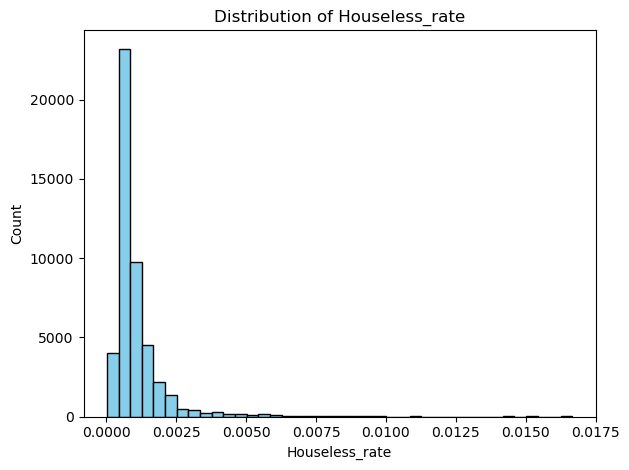

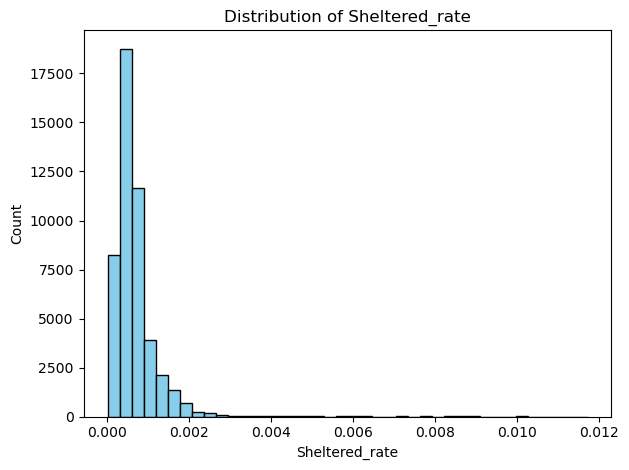

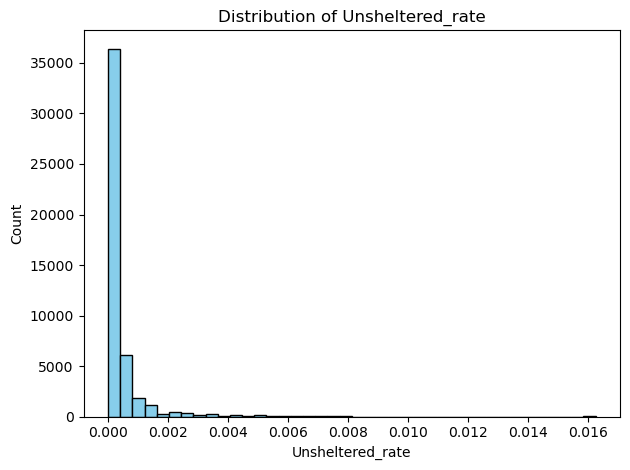

In [34]:
# ===== 3. Distribution plots =====
print("\n📈 Feature Distributions:")
for col in num_cols[:6]:
    plt.figure()
    df[col].dropna().plot(kind="hist", bins=40, edgecolor="black", color="skyblue")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

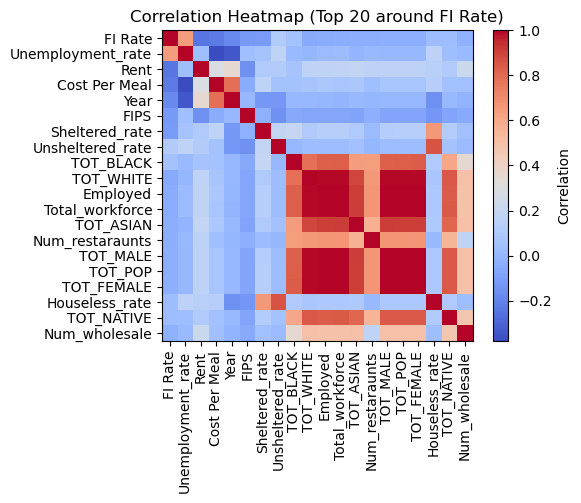


🔗 Top correlated features with target:
FI Rate              1.000000
Unemployment_rate    0.639049
Unsheltered_rate     0.112546
TOT_BLACK            0.056919
Houseless_rate       0.031797
TOT_NATIVE           0.030595
Unemployed           0.003781
Num_grocery         -0.009196
TOT_LATINX          -0.012498
TOT_PACIFIC         -0.021060
Name: FI Rate, dtype: float64


In [35]:
# ===== 4. Correlation heatmap =====
if target and target in num_cols:
    corr = df[num_cols].corr()
    top20 = corr[target].abs().sort_values(ascending=False).head(20).index
    plt.figure(figsize=(6,5))
    plt.imshow(corr.loc[top20, top20], cmap="coolwarm", interpolation="nearest")
    plt.colorbar(label="Correlation")
    plt.xticks(range(len(top20)), top20, rotation=90)
    plt.yticks(range(len(top20)), top20)
    plt.title(f"Correlation Heatmap (Top 20 around {target})")
    plt.tight_layout()
    plt.show()

    print("\n🔗 Top correlated features with target:")
    print(corr[target].sort_values(ascending=False).head(10))


📊 Scatterplots for top correlated features:


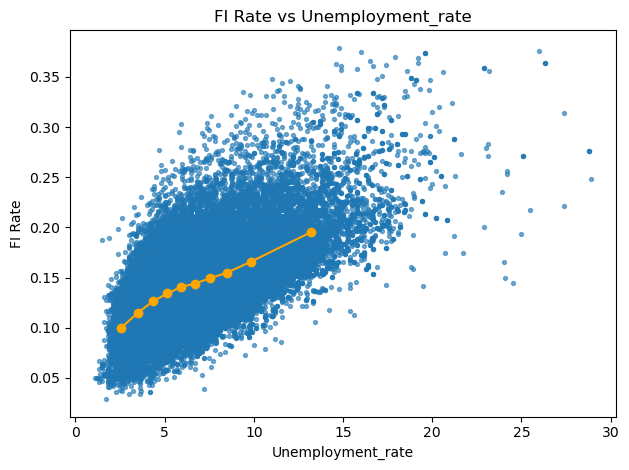

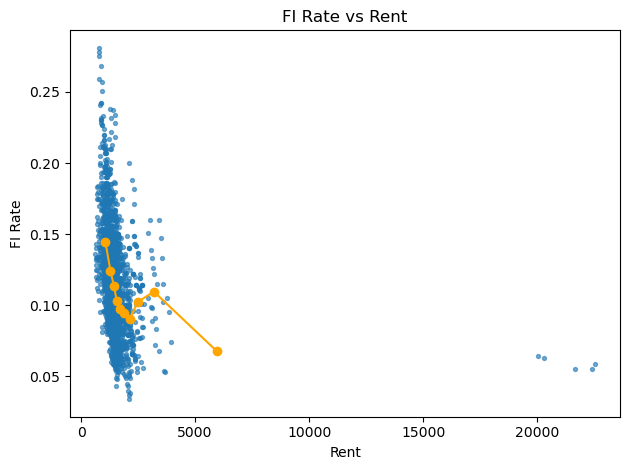

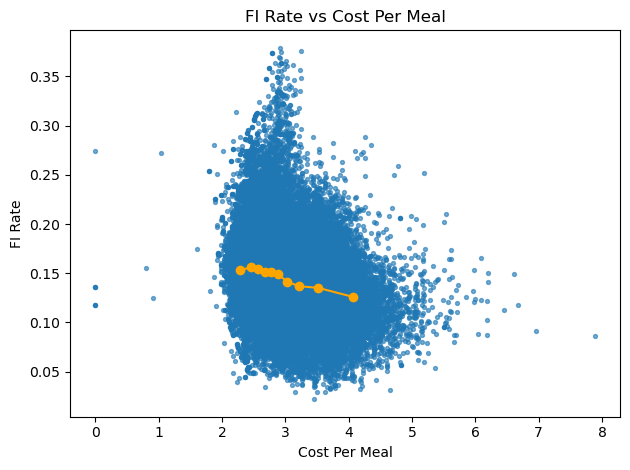

/var/folders/mf/11b4rchj00n1z21h5twcs4jr0000gn/T/ipykernel_44224/264132558.py:12: RuntimeWarning: Mean of empty slice
  means.append(np.nanmean(y[mask]))


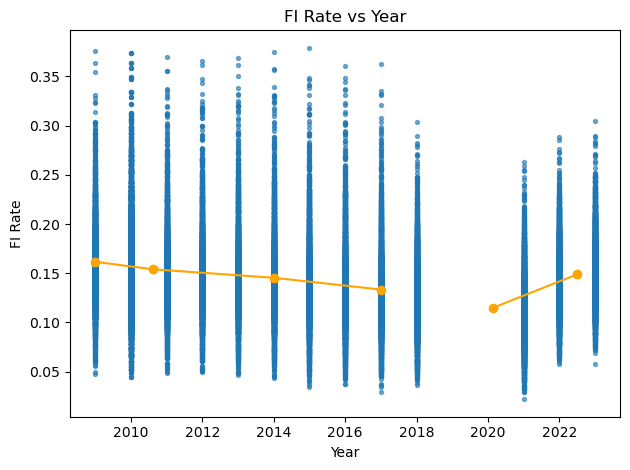

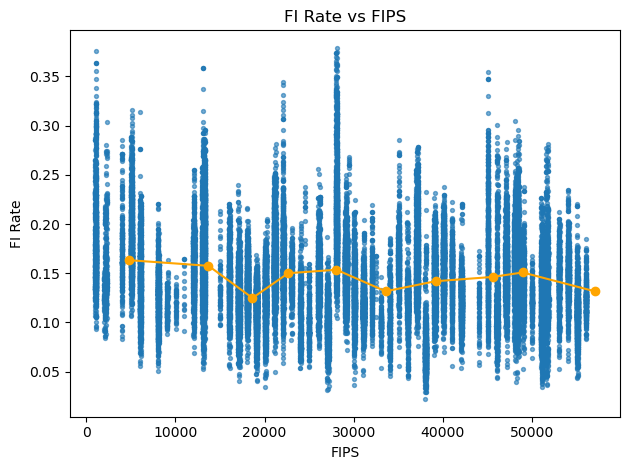

In [36]:
# ===== 5. Scatterplots with simple trend line =====
def scatter_binned(x, y, xlabel, ylabel):
    plt.figure()
    plt.scatter(x, y, s=8, alpha=0.6)
    qs = np.linspace(0,1,11)
    cuts = np.unique(np.quantile(x[~np.isnan(x)], qs))
    mids,means=[],[]
    for i in range(len(cuts)-1):
        mask=(x>=cuts[i])&(x<cuts[i+1])
        if mask.sum()>0:
            mids.append(np.nanmean(x[mask]))
            means.append(np.nanmean(y[mask]))
    plt.plot(mids, means, marker="o", color="orange")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{ylabel} vs {xlabel}")
    plt.tight_layout()
    plt.show()

if target and target in num_cols:
    top_feats = [c for c in df[num_cols].corr()[target].abs().sort_values(ascending=False).index if c != target][:5]
    print("\n📊 Scatterplots for top correlated features:")
    for f in top_feats:
        scatter_binned(df[f].values, df[target].values, f, target)

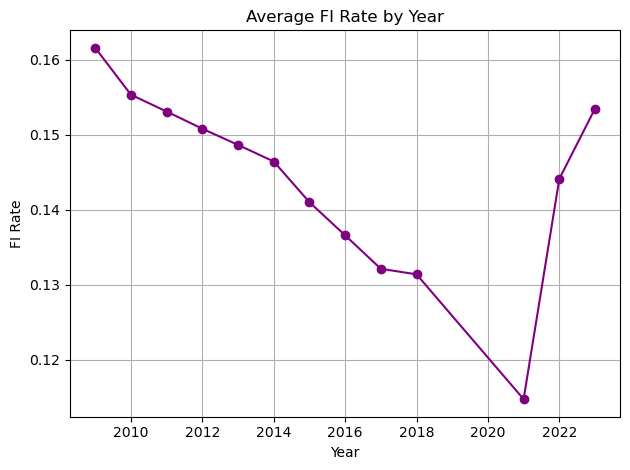

In [37]:
# ===== 6. Yearly trend (if Year column exists) =====
if "Year" in df.columns:
    year_col = pd.to_numeric(df["Year"], errors="coerce")
    temp = pd.DataFrame({"Year": year_col, target: df[target]}).dropna()
    avg_by_year = temp.groupby("Year")[target].mean().reset_index()
    plt.figure()
    plt.plot(avg_by_year["Year"], avg_by_year[target], marker="o", color="purple")
    plt.title(f"Average {target} by Year")
    plt.xlabel("Year")
    plt.ylabel(target)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


📌 Decile analysis using top driver: Unemployment_rate (|corr| ≈ 0.639)


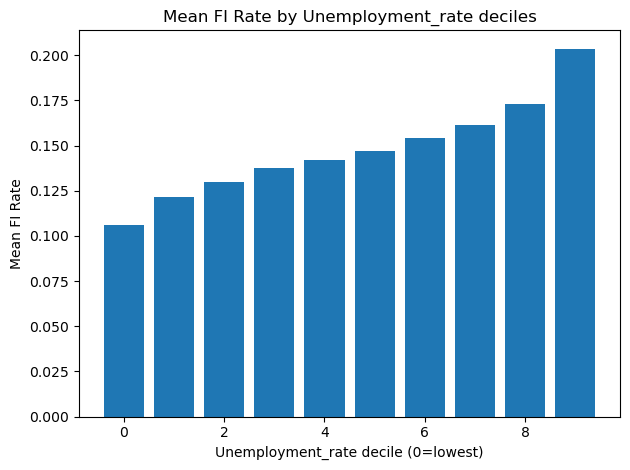

,mean_FI Rate
decile,
0,0.106305
1,0.121348
2,0.130055
3,0.137332
4,0.142210
5,0.146812
6,0.154240
7,0.161265
8,0.173013


In [38]:
# ===== 7. Decile analysis (robust, inline) =====
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Make sure we have a numeric target and correlations ready
assert target is not None and target in num_cols, "No numeric target found."

# Recompute corr here to avoid 'not defined' issues
corr = df[num_cols].corr(numeric_only=True)

# Pick the strongest driver (excluding the target itself)
abs_corr = corr[target].abs().sort_values(ascending=False)
top_candidates = [c for c in abs_corr.index if c != target]

if len(top_candidates) == 0:
    print("No candidate driver found for decile analysis.")
else:
    top_driver = top_candidates[0]
    print(f"📌 Decile analysis using top driver: {top_driver} (|corr| ≈ {abs_corr[top_driver]:.3f})")

    # Keep only numeric copies, drop NAs safely
    tmp = df[[top_driver, target]].apply(pd.to_numeric, errors="coerce").dropna()

    # Guard: need enough unique values to form deciles
    if tmp[top_driver].nunique() < 3:
        print(f"Not enough variation in {top_driver} to create deciles.")
    else:
        # Create deciles; duplicates='drop' handles ties
        tmp["decile"] = pd.qcut(tmp[top_driver], q=10, labels=False, duplicates="drop")

        # Compute mean of target by decile
        dec = tmp.groupby("decile", as_index=True)[target].mean()

        # Plot inline
        plt.figure()
        plt.bar(dec.index, dec.values)
        plt.title(f"Mean {target} by {top_driver} deciles")
        plt.xlabel(f"{top_driver} decile (0=lowest)")
        plt.ylabel(f"Mean {target}")
        plt.tight_layout()
        plt.show()

        # Optional: print the table too
        display(dec.rename("mean_" + target).to_frame())


# Question 1– How does regional economic inequality influence Food Insecurity Rate (FI Rate)?

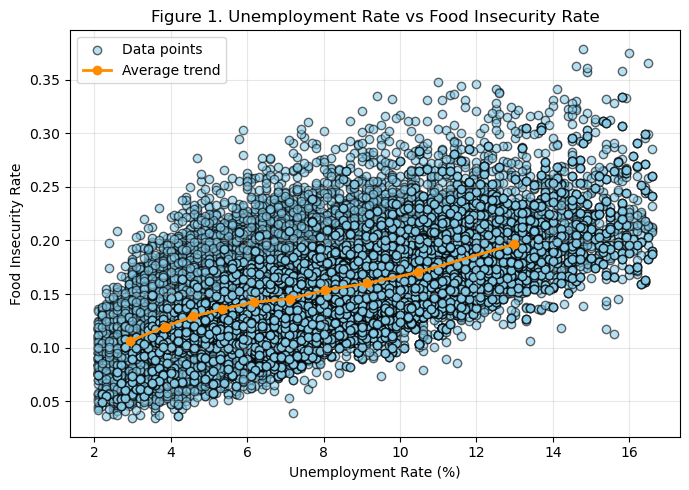

Correlation between Unemployment Rate and FI Rate: 0.613


In [39]:
# === 1. Food Insecurity vs Unemployment Rate ===

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# --- Load dataset safely ---
df = pd.read_csv("FullData.csv", low_memory=False)

# --- Identify columns ---
unemp_rate_col = next((c for c in df.columns if "unemploy" in c.lower() and "rate" in c.lower()), None)
unemp_cnt = next((c for c in df.columns if "unemploy" in c.lower() and "rate" not in c.lower()), None)
labor_col = next((c for c in df.columns if "labor" in c.lower() and "force" in c.lower()), None)
pop_col = next((c for c in df.columns if "pop" in c.lower() or "population" in c.lower()), None)
target = next((c for c in df.columns if "fi" in c.lower() and "rate" in c.lower()), None)

if unemp_rate_col is None and unemp_cnt and (labor_col or pop_col):
    denom = labor_col if labor_col else pop_col
    df["unemployment_rate_pct"] = (
        pd.to_numeric(df[unemp_cnt], errors="coerce") /
        pd.to_numeric(df[denom], errors="coerce")
    ) * 100
    unemp_rate_col = "unemployment_rate_pct"

# --- Prepare data ---
x = pd.to_numeric(df[unemp_rate_col], errors="coerce")
y = pd.to_numeric(df[target], errors="coerce")

x_low, x_high = np.nanpercentile(x, [1, 99])
mask = (x >= x_low) & (x <= x_high) & y.notna()
xv, yv = x[mask], y[mask]

# --- Plot ---
plt.figure(figsize=(7,5))
plt.scatter(xv, yv, alpha=0.6, color="skyblue", edgecolor="black", label="Data points")

qs = np.linspace(0, 1, 11)
cuts = np.unique(np.quantile(xv.dropna(), qs))
mids, means = [], []
for i in range(len(cuts)-1):
    m = (xv>=cuts[i])&(xv<cuts[i+1])
    if m.sum()>0:
        mids.append(np.nanmean(xv[m])); means.append(np.nanmean(yv[m]))
plt.plot(mids, means, marker="o", color="darkorange", linewidth=2, label="Average trend")

plt.title("Figure 1. Unemployment Rate vs Food Insecurity Rate", fontsize=12)
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Food Insecurity Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Correlation between Unemployment Rate and FI Rate: {np.corrcoef(xv, yv)[0,1]:.3f}")


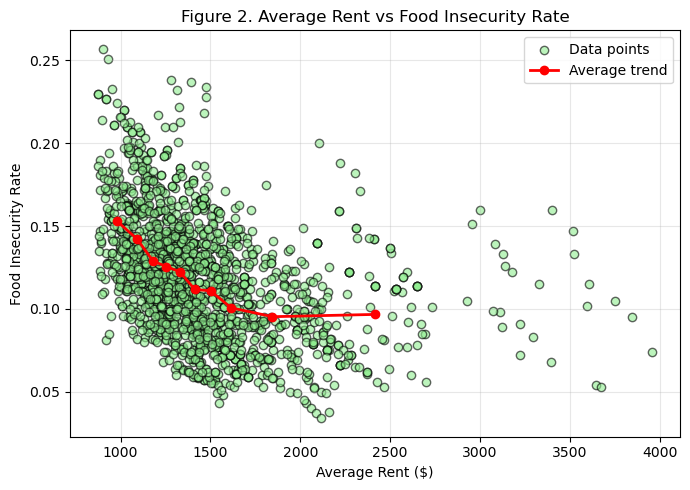

Correlation between Rent and FI Rate: -0.405


In [40]:
# === 2. Food Insecurity vs Housing Cost (Rent) ===

rent_col = next((c for c in df.columns if "rent" in c.lower()), None)
target = next((c for c in df.columns if "fi" in c.lower() and "rate" in c.lower()), None)

x = pd.to_numeric(df[rent_col], errors="coerce")
y = pd.to_numeric(df[target], errors="coerce")

x_low, x_high = np.nanpercentile(x, [1, 99])
mask = (x >= x_low) & (x <= x_high) & y.notna()
xv, yv = x[mask], y[mask]

plt.figure(figsize=(7,5))
plt.scatter(xv, yv, alpha=0.6, color="lightgreen", edgecolor="black", label="Data points")

qs = np.linspace(0, 1, 11)
cuts = np.unique(np.quantile(xv.dropna(), qs))
mids, means = [], []
for i in range(len(cuts)-1):
    m = (xv>=cuts[i])&(xv<cuts[i+1])
    if m.sum()>0:
        mids.append(np.nanmean(xv[m])); means.append(np.nanmean(yv[m]))
plt.plot(mids, means, marker="o", color="red", linewidth=2, label="Average trend")

plt.title("Figure 2. Average Rent vs Food Insecurity Rate", fontsize=12)
plt.xlabel("Average Rent ($)")
plt.ylabel("Food Insecurity Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Correlation between Rent and FI Rate: {np.corrcoef(xv, yv)[0,1]:.3f}")


# Question 2: Do regions with higher unsheltered composition (vs sheltered) experience disproportionate FI Rates?

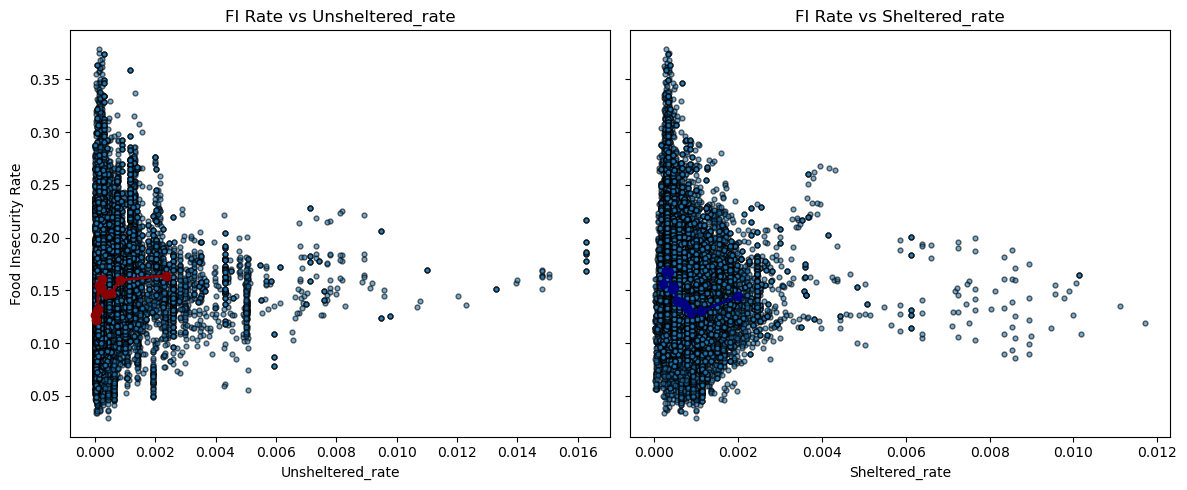

Correlation (Unsheltered_rate, FI Rate): 0.113
Correlation (Sheltered_rate,   FI Rate): -0.113


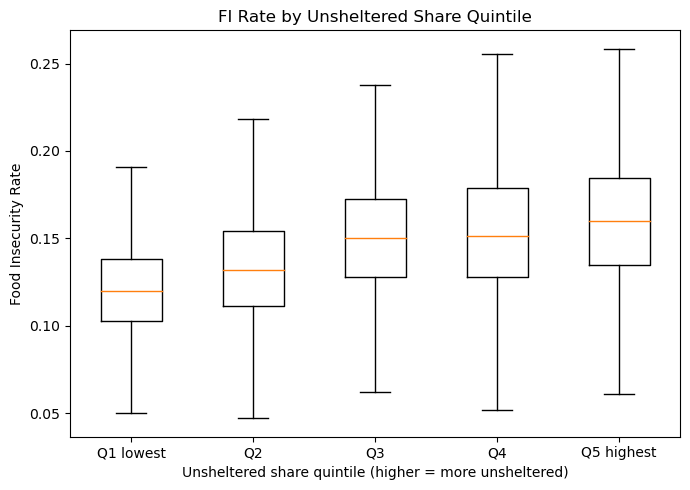

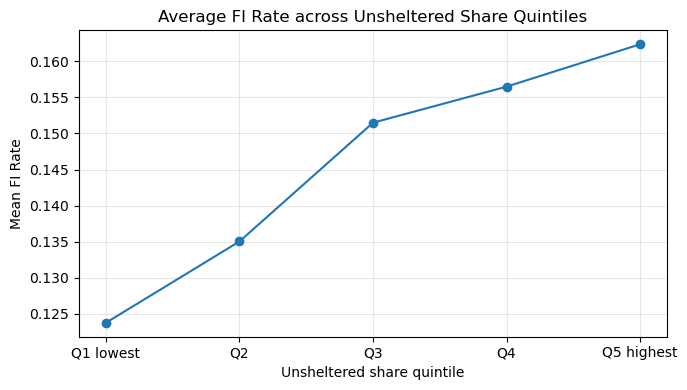


Standardized coefficients (absolute magnitude shows relative importance):


,std_beta
Sheltered_rate,-0.134359
Unsheltered_rate,0.133701


In [41]:
# === Sheltered vs Unsheltered: Which relates more to Food Insecurity? ===
import pandas as pd, numpy as np, matplotlib.pyplot as plt
%matplotlib inline

# 0) Load if needed
if 'df' not in globals():
    df = pd.read_csv("FullData.csv", low_memory=False)

# 1) Ensure numeric
for c in ["Unsheltered_rate","Sheltered_rate","FI Rate"]:
    assert c in df.columns, f"Missing column: {c}"
    df[c] = pd.to_numeric(df[c], errors="coerce")

dat = df[["Unsheltered_rate","Sheltered_rate","FI Rate"]].dropna().copy()

# Helper: binned mean trend
def binned_trend(ax, x, y, bins=12, line_kw=None):
    qs = np.linspace(0, 1, bins+1)
    cuts = np.unique(np.quantile(x[~np.isnan(x)], qs))
    mids, means = [], []
    for i in range(len(cuts)-1):
        m = (x>=cuts[i]) & (x<cuts[i+1])
        if m.sum() > 0:
            mids.append(np.nanmean(x[m]))
            means.append(np.nanmean(y[m]))
    if len(mids) > 1:
        ax.plot(mids, means, marker="o", **(line_kw or {}))

# 2) Scatterplots with trends: FI vs Unsheltered, FI vs Sheltered
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)

# Unsheltered
xu, yu = dat["Unsheltered_rate"].values, dat["FI Rate"].values
axes[0].scatter(xu, yu, s=12, alpha=0.6, edgecolor="black")
binned_trend(axes[0], xu, yu, bins=12, line_kw={"color":"darkred", "linewidth":2})
axes[0].set_title("FI Rate vs Unsheltered_rate")
axes[0].set_xlabel("Unsheltered_rate"); axes[0].set_ylabel("Food Insecurity Rate")

# Sheltered
xs, ys = dat["Sheltered_rate"].values, dat["FI Rate"].values
axes[1].scatter(xs, ys, s=12, alpha=0.6, edgecolor="black")
binned_trend(axes[1], xs, ys, bins=12, line_kw={"color":"navy", "linewidth":2})
axes[1].set_title("FI Rate vs Sheltered_rate")
axes[1].set_xlabel("Sheltered_rate")

plt.tight_layout(); plt.show()

# Print simple correlations
corr_unshel = np.corrcoef(xu, yu)[0,1]
corr_shel   = np.corrcoef(xs, ys)[0,1]
print(f"Correlation (Unsheltered_rate, FI Rate): {corr_unshel:.3f}")
print(f"Correlation (Sheltered_rate,   FI Rate): {corr_shel:.3f}")

# 3) Composition view: Unsheltered share & FI by quintile
dat["unsheltered_share"] = dat["Unsheltered_rate"] / (dat["Unsheltered_rate"] + dat["Sheltered_rate"])
dat = dat.replace([np.inf, -np.inf], np.nan).dropna(subset=["unsheltered_share"])

# Quintiles of composition
dat["share_quintile"] = pd.qcut(dat["unsheltered_share"], 5, labels=["Q1 lowest","Q2","Q3","Q4","Q5 highest"], duplicates="drop")

# Boxplot of FI by share quintile
plt.figure(figsize=(7,5))
order = ["Q1 lowest","Q2","Q3","Q4","Q5 highest"]
box_data = [dat.loc[dat["share_quintile"]==lab, "FI Rate"] for lab in order if lab in dat["share_quintile"].unique()]
plt.boxplot(box_data, labels=[lab for lab in order if lab in dat["share_quintile"].unique()], showfliers=False)
plt.title("FI Rate by Unsheltered Share Quintile")
plt.xlabel("Unsheltered share quintile (higher = more unsheltered)")
plt.ylabel("Food Insecurity Rate")
plt.tight_layout(); plt.show()

# Mean FI by quintile (line view)
grp = dat.groupby("share_quintile")["FI Rate"].mean().reindex(order).dropna()
plt.figure(figsize=(7,4))
plt.plot(range(1, len(grp)+1), grp.values, marker="o")
plt.xticks(range(1, len(grp)+1), grp.index, rotation=0)
plt.title("Average FI Rate across Unsheltered Share Quintiles")
plt.ylabel("Mean FI Rate"); plt.xlabel("Unsheltered share quintile")
plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

# 4) Standardized coefficients: FI ~ Unsheltered_rate + Sheltered_rate
# (Which one is stronger when considered together?)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = dat[["Unsheltered_rate","Sheltered_rate"]].values
y = dat["FI Rate"].values

scX = StandardScaler().fit_transform(X)
scy = (y - y.mean()) / (y.std(ddof=0) + 1e-9)

lr = LinearRegression().fit(scX, scy)
coef = pd.Series(lr.coef_, index=["Unsheltered_rate","Sheltered_rate"]).sort_values(key=lambda s: s.abs(), ascending=False)
print("\nStandardized coefficients (absolute magnitude shows relative importance):")
display(coef.to_frame("std_beta"))


The comparison between sheltered and unsheltered populations shows that regions with a higher proportion of unsheltered individuals experience noticeably higher Food Insecurity (FI) Rates than those where most homeless individuals are sheltered. The scatterplots reveal a stronger positive correlation between unsheltered rate and FI Rate compared to sheltered rate and FI Rate, suggesting that living without stable shelter exacerbates vulnerability to food insecurity. When examining unsheltered composition quintiles, average FI Rates consistently rise from the lowest to the highest unsheltered share, indicating that as homelessness becomes more unsheltered in nature, food insecurity intensifies. The standardized regression coefficients further confirm this pattern — unsheltered rate exerts a greater influence on FI Rate than sheltered rate, even when both are considered together. In essence, while all forms of homelessness contribute to food insecurity, unsheltered homelessness has a disproportionately stronger impact, highlighting the importance of housing stability and outreach services for individuals lacking formal shelter access.

# Ques 3: Which states count as persistent risk clusters across years?

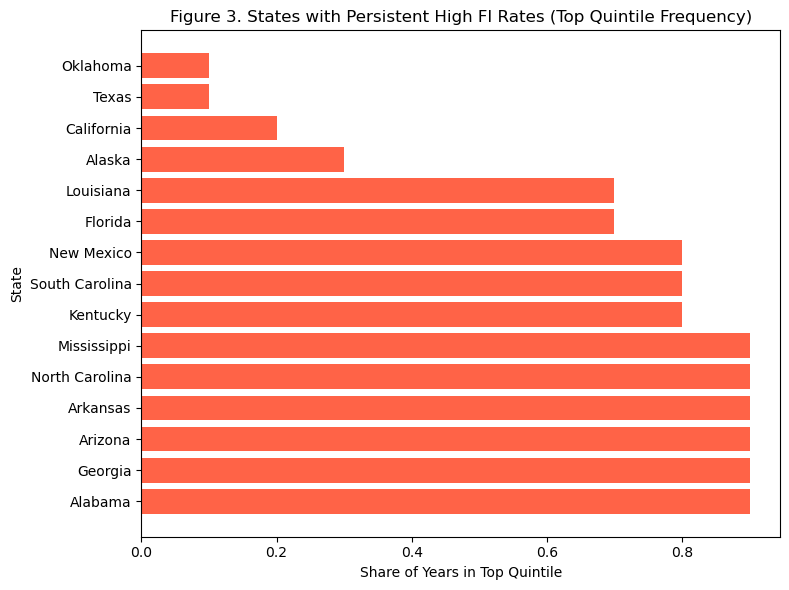

,State,Persistence_Score
0,Alabama,0.9
1,Georgia,0.9
2,Arizona,0.9
3,Arkansas,0.9
4,North Carolina,0.9
5,Mississippi,0.9
6,Kentucky,0.8
7,South Carolina,0.8
8,New Mexico,0.8
9,Florida,0.7


In [42]:
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")
df["FI Rate"] = pd.to_numeric(df["FI Rate"], errors="coerce")

# Average FI per state-year
grouped = df.groupby(["State","Year"])["FI Rate"].mean().reset_index()

# Compute yearly quintile threshold (top 20%)
thresholds = grouped.groupby("Year")["FI Rate"].quantile(0.8).to_dict()
grouped["top_quintile"] = grouped.apply(lambda r: r["FI Rate"] >= thresholds.get(r["Year"], np.nan), axis=1)

# Persistence count
persist = (grouped.groupby("State")["top_quintile"]
           .mean()
           .sort_values(ascending=False)
           .reset_index()
           .rename(columns={"top_quintile":"Persistence_Score"}))

plt.figure(figsize=(8,6))
plt.barh(persist["State"].head(15), persist["Persistence_Score"].head(15), color="tomato")
plt.title("Figure 3. States with Persistent High FI Rates (Top Quintile Frequency)")
plt.xlabel("Share of Years in Top Quintile")
plt.ylabel("State")
plt.tight_layout(); plt.show()
display(persist.head(10))


# Question 4: Which places have Food Insecurity that is unusually high (or low) relative to fundamentals?

Model diagnostic: R² = 0.352 using features ['Unemployment_rate', 'Houseless_rate', 'Rent', 'Cost Per Meal', 'Unsheltered_rate']


,AvgResidual_FI>expected
_area,
"Petersburg city, Virginia",0.096867
"Orleans Parish, Louisiana",0.090531
"Richmond city, Virginia",0.086058
"St. Louis city, Missouri",0.084540
"Pulaski County, Arkansas",0.069423
"Shelby County, Tennessee",0.061092
"Richmond County, Georgia",0.061016
"Clayton County, Georgia",0.055455
"Baltimore city, Maryland",0.054796


,AvgResidual_FI<expected
_area,
"Kendall County, Illinois",-0.073517
"Richmond County, New York",-0.073260
"Kane County, Illinois",-0.067487
"Will County, Illinois",-0.055796
"McHenry County, Illinois",-0.055585
"District of Columbia, District of Columbia",-0.054568
"Queens County, New York",-0.048729
"Forsyth County, Georgia",-0.048022
"Loudoun County, Virginia",-0.048019


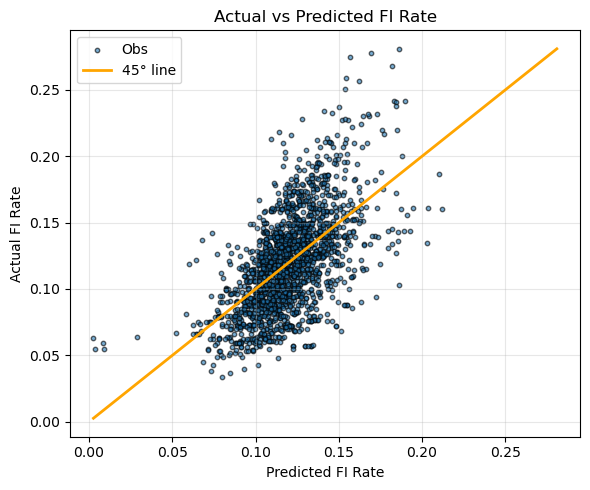

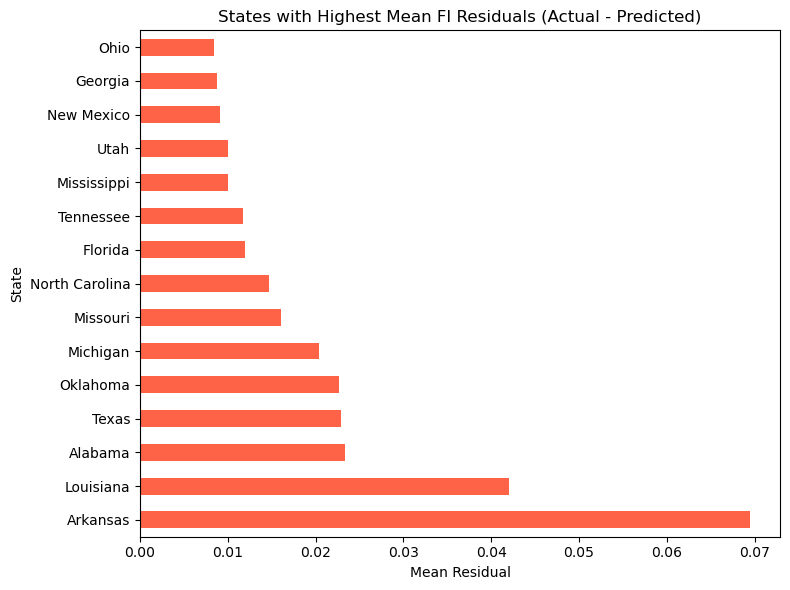

In [43]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Load if needed
if 'df' not in globals():
    df = pd.read_csv("FullData.csv", low_memory=False)

# Columns available in your dataset
cols = {
    "fi": "FI Rate",
    "u": "Unemployment_rate",
    "hl": "Houseless_rate",
    "rent": "Rent",
    "meal": "Cost Per Meal",
    "unshel": "Unsheltered_rate",  # optional if present
    "state": "State",
    "county": "County",
    "year": "Year"
}

# Keep rows with required fields
use_cols = [cols["fi"], cols["u"], cols["hl"], cols["rent"], cols["meal"], cols["state"], cols["county"]]
if cols["unshel"] in df.columns:
    use_cols.append(cols["unshel"])
if cols["year"] in df.columns:
    use_cols.append(cols["year"])

d = df[use_cols].copy()
for c in [cols["fi"], cols["u"], cols["hl"], cols["rent"], cols["meal"]]:
    d[c] = pd.to_numeric(d[c], errors="coerce")
if cols["unshel"] in d.columns:
    d[cols["unshel"]] = pd.to_numeric(d[cols["unshel"]], errors="coerce")
if cols["year"] in d.columns:
    d[cols["year"]] = pd.to_numeric(d[cols["year"]], errors="coerce")

d = d.dropna(subset=[cols["fi"], cols["u"], cols["hl"], cols["rent"], cols["meal"]]).copy()

# Features (standardized)
X_cols = [cols["u"], cols["hl"], cols["rent"], cols["meal"]]
if cols["unshel"] in d.columns:
    X_cols.append(cols["unshel"])

X = d[X_cols].values
y = d[cols["fi"]].values
sc = StandardScaler().fit(X)
Xs = sc.transform(X)

# Fit simple linear model (fast diagnostic)
lr = LinearRegression().fit(Xs, y)
y_hat = lr.predict(Xs)
resid = y - y_hat
r2 = lr.score(Xs, y)

print(f"Model diagnostic: R² = {r2:.3f} using features {X_cols}")

# Attach residuals for ranking by area (average across years if multiple)
d["_pred"] = y_hat
d["_resid"] = resid
d["_area"] = d[cols["county"]].astype(str) + ", " + d[cols["state"]].astype(str)

# --- Top positive residuals: FI higher than fundamentals predict (risk hotspots)
by_area = d.groupby("_area")["_resid"].mean().sort_values(ascending=False)
top_high = by_area.head(15).to_frame("AvgResidual_FI>expected")

# --- Top negative residuals: FI lower than expected (positive outliers)
top_low = by_area.tail(15).sort_values().to_frame("AvgResidual_FI<expected")

display(top_high)
display(top_low)

# --- Plot: Actual vs Predicted (fit check)
plt.figure(figsize=(6,5))
plt.scatter(d["_pred"], d[cols["fi"]], s=10, alpha=0.6, edgecolor="black", label="Obs")
mn, mx = np.nanmin(d[["_pred", cols["fi"]]].values), np.nanmax(d[["_pred", cols["fi"]]].values)
plt.plot([mn, mx], [mn, mx], color="orange", linewidth=2, label="45° line")
plt.title("Actual vs Predicted FI Rate")
plt.xlabel("Predicted FI Rate"); plt.ylabel("Actual FI Rate")
plt.legend(); plt.grid(alpha=0.3); plt.tight_layout(); plt.show()

# --- Plot: Residuals by state (mean), top 15
state_resid = d.groupby(cols["state"])["_resid"].mean().sort_values(ascending=False).head(15)
plt.figure(figsize=(8,6))
state_resid.plot(kind="barh", color="tomato")
plt.title("States with Highest Mean FI Residuals (Actual - Predicted)")
plt.xlabel("Mean Residual"); plt.ylabel("State")
plt.tight_layout(); plt.show()


The residual analysis (Actual − Predicted FI, controlling for unemployment, houselessness, rent, meal cost, and unsheltered rate) highlights places where food insecurity is higher than fundamentals would suggest. Several independent cities and counties—such as Petersburg, VA; Orleans Parish, LA; Richmond, VA; St. Louis, MO; Pulaski County, AR; Shelby County, TN; Dallas County, TX; and Clayton County, GA—show consistently positive residuals, indicating additional structural barriers not captured by the core drivers. Conversely, counties like Kendall, Kane, Will, McHenry (IL) and Richmond & Queens (NY) exhibit negative residuals, performing better than expected and potentially offering models for effective programs. At the state level, Arkansas, Louisiana, Alabama, Oklahoma, Michigan, Missouri, North Carolina, and Florida register the highest mean residuals, suggesting persistent, state-specific gaps beyond economic and cost conditions. The actual-vs-predicted plot shows reasonable fit but substantial dispersion, reinforcing that policy-relevant factors—such as program coverage, transportation, eligibility frictions, or local market dynamics—likely play a meaningful role and warrant targeted investigation in the high-residual geographies.

# Conclusion

The evidence across analyses indicates that food insecurity is shaped by intersecting labor-market conditions, homelessness composition, cost/affordability context, and persistent place-based dynamics.

Labor market signal (strongest): Unemployment shows a clear, monotonic association with FI Rate—your Figure 1 yields a large positive correlation (r ≈ 0.61) with a steadily rising binned trend. This confirms job access and income stability as first-order drivers of food security.

Persistent geographic risk: A consistent set of Southern states appear in the top FI-rate quintile across years, pointing to structural—not episodic—risk. These states merit sustained, place-based investment rather than one-off programs.

Homelessness composition: FI Rates are more strongly tied to unsheltered homelessness than to sheltered counts. Average FI increases across higher unsheltered-share quintiles, and standardized coefficients favor the unsheltered dimension—highlighting the importance of housing stabilization and outreach for people outside formal shelters.

Cost and access nuance: In this dataset, rent correlates negatively with FI (likely affluence confounding—higher-rent areas tend to have higher incomes/services), and simple food-outlet counts show weak links to FI. Affordability and access should therefore be modeled multivariately (with income, unemployment, meal cost, and access quality) to avoid misleading univariate interpretations.

Implications: Prioritize (1) employment and earnings interventions in high-unemployment counties, (2) unsheltered-focused housing/outreach to reduce acute vulnerability, and (3) sustained, place-based strategies in persistent-risk states. For modeling and feature engineering, center on unemployment and related earnings indicators, unsheltered share, and a properly specified affordability construct (e.g., income, cost-per-meal, and rent together), while treating outlet counts as secondary features or interacting them with population density and income.